In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
import numpy as np

In [4]:
data = pd.read_csv('dataset.csv')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
X = data.drop(labels=['target'], axis=1)
y = data.target

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                 shuffle=True)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# scaling done , other preprocessing not needed in this data

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [23]:
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [24]:
def eveluate_model(model,x_test,y_test):  
    score_report = {}
    pred = model.predict(x_test)
    from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
    score_report['accuracy_score'] = accuracy_score(pred,y_test)
    score_report['precision_score'] = precision_score(pred,y_test)
    score_report['recall_score'] = recall_score(pred,y_test)
    score_report['f1_score'] = f1_score(pred,y_test)
    return score_report

In [25]:
eveluate_model(forest,x_test,y_test)

{'accuracy_score': 0.8241758241758241,
 'precision_score': 0.9148936170212766,
 'recall_score': 0.7818181818181819,
 'f1_score': 0.8431372549019609}

In [43]:
# extracting top 5 most important features

In [35]:
feature_imp = forest.feature_importances_

In [40]:
sorted_indices = np.argsort(feature_imp)[::-1]
feature_names = X.columns
sorted_feature_name = feature_names[sorted_indices]
sorted_feature_importance = feature_imp[sorted_indices]

In [47]:
top5_feature_imp = sorted_feature_importance[:5]
top5_feature_name = sorted_feature_name[:5]

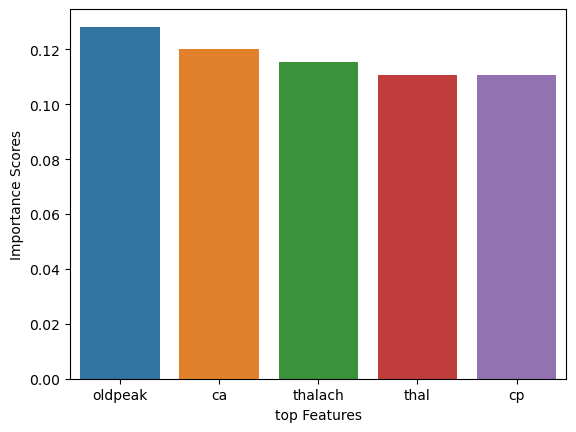

In [53]:
import seaborn as sns
sns.barplot(x=top5_feature_name,y=top5_feature_imp)
plt.xlabel("top Features")
plt.ylabel("Importance Scores")
plt.show()

In [63]:
# Hypeparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [64]:
random_cv = RandomizedSearchCV(RandomForestClassifier(),param_distributions=params, cv=5)
random_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]})

In [66]:
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 15}

In [67]:
random_cv.best_score_

0.8538205980066446

In [68]:
# compare with default model

In [69]:
default_forest = RandomForestClassifier()
default_forest.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
tuned_model_report = eveluate_model(random_cv,x_test,y_test)
default_model_report = eveluate_model(default_forest,x_test,y_test)

In [71]:
tuned_model_report

{'accuracy_score': 0.8241758241758241,
 'precision_score': 0.9148936170212766,
 'recall_score': 0.7818181818181819,
 'f1_score': 0.8431372549019609}

In [72]:
default_model_report

{'accuracy_score': 0.8131868131868132,
 'precision_score': 0.9148936170212766,
 'recall_score': 0.7678571428571429,
 'f1_score': 0.8349514563106796}